In [1]:
import os
os.chdir(r'E:\流水分析')

In [3]:
for file in os.listdir():
    print(file)

门店数据－2018-06-15_01.csv
门店数据－2018-06-15_02.csv
门店数据－2018-06-15_03.csv
门店数据－2018-06-15_04.csv
门店数据－2018-06-15_05.csv
门店数据－2018-06-15_06.csv


In [26]:
import pandas as pd
data_path = 'E:\流水分析'
data = pd.DataFrame()

for file in os.listdir():
    data_file = os.path.join(data_path,file)
    print(data_file)
    data_arr = pd.read_csv(data_file,engine='python')
    data = pd.concat([data,data_arr])
print(data.shape)

E:\流水分析\门店数据－2018-06-15_01.csv
E:\流水分析\门店数据－2018-06-15_02.csv
E:\流水分析\门店数据－2018-06-15_03.csv
E:\流水分析\门店数据－2018-06-15_04.csv
E:\流水分析\门店数据－2018-06-15_05.csv
E:\流水分析\门店数据－2018-06-15_06.csv
(730250, 11)


In [27]:
data.columns

Index(['时间', '门店ID', '门店', '秒付流水', '城市', '秒付业务状态', '大区', '支付业务状态', '门店码流水',
       '桌面码流水', '支付流水'],
      dtype='object')

In [34]:
data['秒付流水'] = data['秒付流水'].astype('float')
data['支付流水'] = data['支付流水'].astype('float')
data['收银码流水'] = data['门店码流水'].astype('float') + data['桌面码流水'].astype('float')

In [35]:
data.groupby('时间')['秒付流水','支付流水','收银码流水'].sum()

,秒付流水,支付流水,收银码流水
时间,,,
2018年1月,6.914593e+08,1.178471e+09,3.804891e+08
2018年2月,7.399487e+08,1.176873e+09,3.918225e+08
2018年3月,8.007768e+08,1.146985e+09,4.211535e+08
2018年4月,7.775731e+08,1.004362e+09,3.819068e+08
2018年5月,7.648891e+08,9.281808e+08,3.662745e+08
2018年6月,3.655558e+08,3.864251e+08,1.644684e+08


In [45]:
data.pivot_table(['秒付流水','支付流水','收银码流水'],index=['大区','时间'],aggfunc='sum')

支付流水         收银码流水          秒付流水
大区     时间                                               
东一大区   2018年1月  3.387607e+08  4.295414e+07  2.026087e+08
       2018年2月  3.546360e+08  4.120700e+07  2.074056e+08
       2018年3月  3.453663e+08  4.185819e+07  2.316101e+08
       2018年4月  3.133759e+08  3.553380e+07  2.230455e+08
       2018年5月  2.711438e+08  3.462012e+07  2.230485e+08
       2018年6月  1.110017e+08  1.690923e+07  1.116519e+08
东二大区   2018年1月  1.755695e+08  3.369866e+07  9.865891e+07
       2018年2月  1.772950e+08  3.551312e+07  1.153376e+08
       2018年3月  1.675660e+08  3.964129e+07  1.119194e+08
       2018年4月  1.432467e+08  3.862704e+07  1.062726e+08
       2018年5月  1.315601e+08  3.627024e+07  9.583935e+07
       2018年6月  5.537618e+07  1.504651e+07  4.433426e+07
中西大区   2018年1月  1.447439e+08  1.004930e+08  9.495128e+07
       2018年2月  1.467034e+08  1.095215e+08  1.118561e+08
       2018年3月  1.383741e+08  1.180402e+08  1.189710e+08
       2018年4月  1.279953e+08  1.069903e+08  1.119815e+08
       2018年5月  1.236706e+08  9.606781e+07  1.074702e+08
       2018年6月  5.195877e+07  4.361786e+07  5.300389e+07
北中国    2018年1月  1.154486e+07  2.120608e+05  1.451897e+06
       2018年2月  1.084934e+07  4.525274e+05  1.925265e+06
       2018年3月  9.560649e+06  4.852283e+05  1.485002e+06
       2018年4月  7.076388e+06  5.368254e+05  2.121560e+06
       2018年5月  7.644049e+06  5.057633e+05  3.367258e+06
       2018年6月  2.284176e+06  1.960629e+05  2.191302e+06
华北大区   2018年1月  2.348223e+08  1.390416e+08  1.812340e+08
       2018年2月  2.269716e+08  1.426659e+08  1.836861e+08
       2018年3月  2.212090e+08  1.533840e+08  2.012838e+08
       2018年4月  1.818482e+08  1.452262e+08  2.009447e+08
       2018年5月  1.700833e+08  1.462296e+08  1.979489e+08
       2018年6月  7.103332e+07  6.671325e+07  9.106580e+07
华南大区   2018年1月  2.715209e+08  6.393627e+07  1.125111e+08
       2018年2月  2.592175e+08  6.236018e+07  1.197085e+08
       2018年3月  2.636534e+08  6.762999e+07  1.354607e+08
       2018年4月  2.296980e+08  5.486185e+07  1.331818e+08
       2018年5月  2.230222e+08  5.242663e+07  1.371813e+08
       2018年6月  9.424771e+07  2.191101e+07  6.329542e+07
南中国    2018年1月  1.472134e+06  6.296110e+03  4.039544e+04
       2018年2月  1.200630e+06  2.954590e+03  2.736329e+04
       2018年3月  1.255308e+06  2.383740e+03  4.358790e+04
       2018年4月  1.121791e+06  2.712640e+03  2.388368e+04
       2018年5月  1.056856e+06  3.116070e+03  3.353929e+04
       2018年6月  5.232968e+05  3.920000e+02  1.317520e+04
未知     2018年1月  3.710000e+04  1.471763e+05  3.042810e+03
       2018年2月  0.000000e+00  9.931625e+04  2.129960e+03
       2018年3月  0.000000e+00  1.121584e+05  3.192710e+03
       2018年4月  1.000000e-02  1.280233e+05  1.535780e+03
       2018年5月  0.000000e+00  1.511277e+05  0.000000e+00
       2018年6月  0.000000e+00  7.411412e+04  0.000000e+00
港澳台及国外 2018年1月  0.000000e+00  0.000000e+00  0.000000e+00
       2018年2月  0.000000e+00  0.000000e+00  0.000000e+00
       2018年3月  0.000000e+00  0.000000e+00  1.000000e-02
       2018年4月  0.000000e+00  0.000000e+00  0.000000e+00
       2018年5月  0.000000e+00  0.000000e+00  0.000000e+00
       2018年6月  0.000000e+00  0.000000e+00  0.000000e+00

In [46]:
data.pivot_table(['秒付流水','支付流水','收银码流水'],index=['时间','大区'],aggfunc='sum')

支付流水         收银码流水          秒付流水
时间      大区                                              
2018年1月 东一大区    3.387607e+08  4.295414e+07  2.026087e+08
        东二大区    1.755695e+08  3.369866e+07  9.865891e+07
        中西大区    1.447439e+08  1.004930e+08  9.495128e+07
        北中国     1.154486e+07  2.120608e+05  1.451897e+06
        华北大区    2.348223e+08  1.390416e+08  1.812340e+08
        华南大区    2.715209e+08  6.393627e+07  1.125111e+08
        南中国     1.472134e+06  6.296110e+03  4.039544e+04
        未知      3.710000e+04  1.471763e+05  3.042810e+03
        港澳台及国外  0.000000e+00  0.000000e+00  0.000000e+00
2018年2月 东一大区    3.546360e+08  4.120700e+07  2.074056e+08
        东二大区    1.772950e+08  3.551312e+07  1.153376e+08
        中西大区    1.467034e+08  1.095215e+08  1.118561e+08
        北中国     1.084934e+07  4.525274e+05  1.925265e+06
        华北大区    2.269716e+08  1.426659e+08  1.836861e+08
        华南大区    2.592175e+08  6.236018e+07  1.197085e+08
        南中国     1.200630e+06  2.954590e+03  2.736329e+04
        未知      0.000000e+00  9.931625e+04  2.129960e+03
        港澳台及国外  0.000000e+00  0.000000e+00  0.000000e+00
2018年3月 东一大区    3.453663e+08  4.185819e+07  2.316101e+08
        东二大区    1.675660e+08  3.964129e+07  1.119194e+08
        中西大区    1.383741e+08  1.180402e+08  1.189710e+08
        北中国     9.560649e+06  4.852283e+05  1.485002e+06
        华北大区    2.212090e+08  1.533840e+08  2.012838e+08
        华南大区    2.636534e+08  6.762999e+07  1.354607e+08
        南中国     1.255308e+06  2.383740e+03  4.358790e+04
        未知      0.000000e+00  1.121584e+05  3.192710e+03
        港澳台及国外  0.000000e+00  0.000000e+00  1.000000e-02
2018年4月 东一大区    3.133759e+08  3.553380e+07  2.230455e+08
        东二大区    1.432467e+08  3.862704e+07  1.062726e+08
        中西大区    1.279953e+08  1.069903e+08  1.119815e+08
        北中国     7.076388e+06  5.368254e+05  2.121560e+06
        华北大区    1.818482e+08  1.452262e+08  2.009447e+08
        华南大区    2.296980e+08  5.486185e+07  1.331818e+08
        南中国     1.121791e+06  2.712640e+03  2.388368e+04
        未知      1.000000e-02  1.280233e+05  1.535780e+03
        港澳台及国外  0.000000e+00  0.000000e+00  0.000000e+00
2018年5月 东一大区    2.711438e+08  3.462012e+07  2.230485e+08
        东二大区    1.315601e+08  3.627024e+07  9.583935e+07
        中西大区    1.236706e+08  9.606781e+07  1.074702e+08
        北中国     7.644049e+06  5.057633e+05  3.367258e+06
        华北大区    1.700833e+08  1.462296e+08  1.979489e+08
        华南大区    2.230222e+08  5.242663e+07  1.371813e+08
        南中国     1.056856e+06  3.116070e+03  3.353929e+04
        未知      0.000000e+00  1.511277e+05  0.000000e+00
        港澳台及国外  0.000000e+00  0.000000e+00  0.000000e+00
2018年6月 东一大区    1.110017e+08  1.690923e+07  1.116519e+08
        东二大区    5.537618e+07  1.504651e+07  4.433426e+07
        中西大区    5.195877e+07  4.361786e+07  5.300389e+07
        北中国     2.284176e+06  1.960629e+05  2.191302e+06
        华北大区    7.103332e+07  6.671325e+07  9.106580e+07
        华南大区    9.424771e+07  2.191101e+07  6.329542e+07
        南中国     5.232968e+05  3.920000e+02  1.317520e+04
        未知      0.000000e+00  7.411412e+04  0.000000e+00
        港澳台及国外  0.000000e+00  0.000000e+00  0.000000e+00

In [50]:
import matplotlib.pyplot as plt
from pylab import mpl 
mpl.rcParams['font.sans-serif'] = ['SimHei']

In [58]:
data.groupby('时间')['秒付流水','支付流水','收银码流水'].sum()

,秒付流水,支付流水,收银码流水
时间,,,
2018年1月,6.914593e+08,1.178471e+09,3.804891e+08
2018年2月,7.399487e+08,1.176873e+09,3.918225e+08
2018年3月,8.007768e+08,1.146985e+09,4.211535e+08
2018年4月,7.775731e+08,1.004362e+09,3.819068e+08
2018年5月,7.648891e+08,9.281808e+08,3.662745e+08
2018年6月,3.655558e+08,3.864251e+08,1.644684e+08


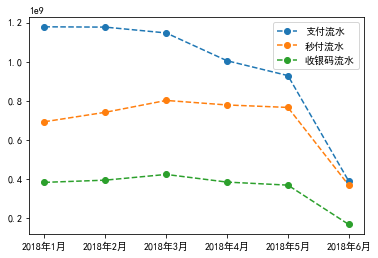

In [141]:
fig_data = data.groupby('时间')['秒付流水','支付流水','收银码流水'].sum()

plt.plot(fig_data['支付流水'],marker='o',linestyle='--',label='支付流水')
plt.plot(fig_data['秒付流水'],marker='o',linestyle='--',label='秒付流水')
plt.plot(fig_data['收银码流水'],marker='o',linestyle='--',label='收银码流水')
plt.legend()

In [76]:
rate = pd.read_excel(r'E:\流水分析\工作簿1.xlsx','Sheet2')
rate

,时间,秒付流水,支付流水,收银码流水
0,2018-01,0.307258,0.523667,0.169075
1,2018-02,0.320512,0.509768,0.169720
2,2018-03,0.338035,0.484182,0.177783
3,2018-04,0.359348,0.464157,0.176495
4,2018-05,0.371424,0.450717,0.177860
5,2018-06,0.398883,0.421655,0.179463


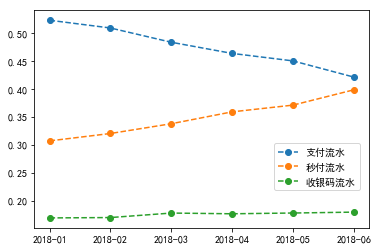

In [127]:
rate.index = rate['时间']
y = rate[['秒付流水','支付流水','收银码流水']]
x = rate.index

plt.plot(x,y['支付流水'],marker='o',linestyle='--',label='支付流水')
plt.plot(x,y['秒付流水'],marker='o',linestyle='--',label='秒付流水')
plt.plot(x,y['收银码流水'],marker='o',linestyle='--',label='收银码流水')
plt.legend(bbox_to_anchor=(0.7, 0.15))

In [118]:
?plt.legend

In [147]:
door_data = data.groupby('门店')['秒付流水','支付流水','收银码流水'].sum()

In [149]:
door_data.sort_values('秒付流水',ascending=False).head(20)

,秒付流水,支付流水,收银码流水
门店,,,
西贝莜面村(深圳香蜜湖店),14076487.81,1064311.36,1035258.02
四季民福烤鸭店(故宫店),12107925.69,0.00,1828401.89
西贝莜面村(北京六里桥店),10684094.13,1388579.79,195755.56
九十九顶毡房(阜石路店),10472092.80,0.00,4583.00
外婆家(杭州西溪印象城店),9997905.32,0.00,103.00
熊猫老灶火锅(延安西路店),9842507.79,0.10,5377.63
西贝莜面村(上海汇智店),9445945.62,850130.94,383426.87
西贝莜面村(杭州下沙龙湖店),9130433.55,904555.42,87139.80
西贝莜面村(上海松江店),9050844.78,1863610.18,105463.00


In [169]:
pd.merge(door_data.sort_values('秒付流水',ascending=False),data[['门店','大区','城市']].drop_duplicates(),on='门店')[['门店','大区','城市','秒付流水','支付流水','收银码流水']].head(20)

,门店,大区,城市,秒付流水,支付流水,收银码流水
0,西贝莜面村(深圳香蜜湖店),华南大区,深圳,14076487.81,1064311.36,1035258.02
1,四季民福烤鸭店(故宫店),华北大区,北京,12107925.69,0.00,1828401.89
2,西贝莜面村(北京六里桥店),华北大区,北京,10684094.13,1388579.79,195755.56
3,九十九顶毡房(阜石路店),华北大区,北京,10472092.80,0.00,4583.00
4,外婆家(杭州西溪印象城店),东一大区,杭州,9997905.32,0.00,103.00
5,熊猫老灶火锅(延安西路店),东一大区,上海,9842507.79,0.10,5377.63
6,西贝莜面村(上海汇智店),东一大区,上海,9445945.62,850130.94,383426.87
7,西贝莜面村(杭州下沙龙湖店),东一大区,杭州,9130433.55,904555.42,87139.80
8,西贝莜面村(上海松江店),东一大区,上海,9050844.78,1863610.18,105463.00
9,西贝莜面村(杭州银泰店),东一大区,杭州,9016182.15,1007012.48,11.00


In [167]:
pd.merge(door_data.sort_values('支付流水',ascending=False),data[['门店','大区','城市']].drop_duplicates(),on='门店')[['门店','大区','城市','支付流水','秒付流水','收银码流水']].head(20)

,门店,大区,城市,支付流水,秒付流水,收银码流水
0,文晖果品(文晖大桥店),东一大区,杭州,42278118.91,0.0,0.00
1,老庙黄金银楼(旗舰店),东一大区,上海,31778070.75,0.0,0.00
2,楼外楼(孤山路店),东一大区,杭州,26532683.48,0.0,0.00
3,胡桃里音乐酒馆(白云店),华南大区,广州,19961805.20,0.0,0.00
4,阿外楼酒店(瓯海大道店),东一大区,温州,19364677.67,0.0,0.00
5,花家怡园(四合院总店),华北大区,北京,17260749.63,0.0,11492.25
6,粤珍轩(北郊店),中西大区,西安,14323979.88,0.0,0.00
7,江南厨子(太古汇店),华南大区,广州,13452536.46,0.0,0.00
8,新洪记丽久饭店(铁西店),华北大区,沈阳,11510527.39,0.0,0.00
9,汉来海港自助餐厅(七宝万科广场店),东一大区,上海,11183209.62,0.0,97966.40


In [168]:
pd.merge(door_data.sort_values('收银码流水',ascending=False),data[['门店','大区','城市']].drop_duplicates(),on='门店')[['门店','大区','城市','收银码流水','秒付流水','支付流水']].head(20)

,门店,大区,城市,收银码流水,秒付流水,支付流水
0,朴田泰式海鲜火锅(泛悦国际店),中西大区,成都,13843954.49,0.00,0.00
1,临家闽南菜(前埔店),华南大区,厦门,11507285.52,997641.18,204409.64
2,青年餐厅(龙德广场店),华北大区,北京,7835320.36,0.00,0.00
3,音乐房子(北滨路店),中西大区,重庆,7599430.73,0.00,0.00
4,马旺子川小馆始于1923(大慈寺店),中西大区,成都,7531561.28,0.00,0.00
5,珮姐老火锅(洪崖洞店),中西大区,重庆,7518502.28,2589535.42,1168444.27
6,全聚德烤鸭店(清华园店),华北大区,北京,7280481.09,5033298.45,0.00
7,莲花餐饮(高新店),中西大区,西安,6326555.44,0.00,1574812.36
8,盛百味(霍营店),华北大区,北京,6304436.44,0.00,0.00
9,青年餐厅(津湾广场店),华北大区,天津,6187782.03,0.00,0.00


In [166]:
door_data.sort_values('收银码流水',ascending=False).head(20)

,秒付流水,支付流水,收银码流水
门店,,,
朴田泰式海鲜火锅(泛悦国际店),0.00,0.00,13843954.49
临家闽南菜(前埔店),997641.18,204409.64,11507285.52
青年餐厅(龙德广场店),0.00,0.00,7835320.36
音乐房子(北滨路店),0.00,0.00,7599430.73
马旺子川小馆始于1923(大慈寺店),0.00,0.00,7531561.28
珮姐老火锅(洪崖洞店),2589535.42,1168444.27,7518502.28
全聚德烤鸭店(清华园店),5033298.45,0.00,7280481.09
莲花餐饮(高新店),0.00,1574812.36,6326555.44
盛百味(霍营店),0.00,0.00,6304436.44


In [ ]:
'门店月度存在分析

In [170]:
data['总流水'] = data['秒付流水']+data['支付流水']+data['收银码流水']

In [175]:
'有总流水的门店
data[data['总流水']>0].shape

(65325, 13)

In [176]:
data[data['总流水']>0].groupby('时间')['门店ID'].count()

时间
2018年1月    11809
2018年2月    11268
2018年3月    11310
2018年4月    10832
2018年5月    10591
2018年6月     9515
Name: 门店ID, dtype: int64

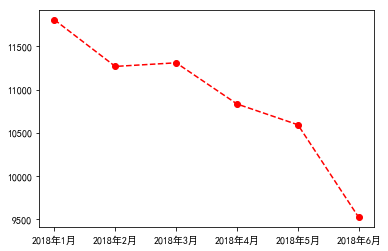

In [184]:
door_count = data[data['总流水']>0].groupby('时间')['门店ID'].count()
plt.plot(door_count,'--or')

In [182]:
1-data[data['总流水']>0].groupby('时间')['门店ID'].count().loc['2018年5月']/data[data['总流水']>0].groupby('时间')['门店ID'].count().loc['2018年1月']

0.10314167160640186